In [81]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import pickle
from scipy.signal import butter, lfilter, find_peaks_cwt, find_peaks
from scipy.stats import kurtosis, skew
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


import random
import os

# preprocessing
first we are going to start with loading the data with pickle and then 
we will start normalizing our data

In [2]:
seed = 57

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

x = pickle.load(open('x.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

x_normal = np.concatenate((x[:300], x[400:]), axis=0)
x_seizure = x[300:400]
print(x_normal.shape)
print(x_seizure.shape)
sampling_freq = 173.6  # based on info from website

b, a = butter(3, [0.5, 40], btype='bandpass', fs=sampling_freq)

x_normal_filtered = np.array([lfilter(b, a, x_normal[ind, :]) for ind in range(x_normal.shape[0])])
x_seizure_filtered = np.array([lfilter(b, a, x_seizure[ind, :]) for ind in range(x_seizure.shape[0])])
print(x_normal.shape)
print(x_seizure.shape)

x_normal = x_normal_filtered
x_seizure = x_seizure_filtered

x = np.concatenate((x_normal, x_seizure))
y = np.concatenate((np.zeros((400, 1)), np.ones((100, 1))))

(400, 4097)
(100, 4097)
(400, 4097)
(100, 4097)


## show some signals 

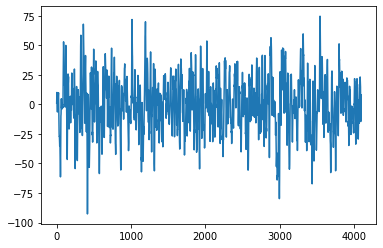

[0.]


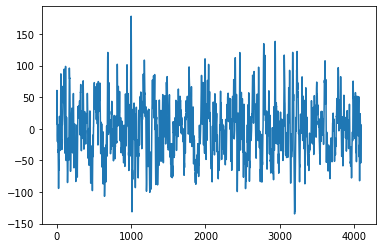

[0.]


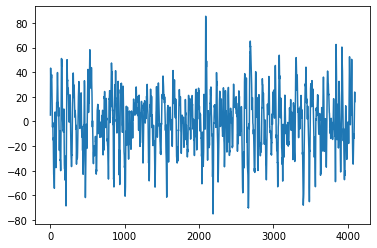

[0.]


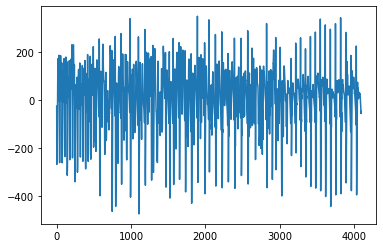

[1.]


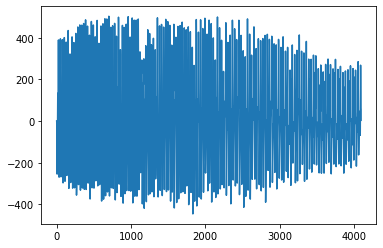

[1.]


In [3]:
# plot some of the signals and their y values
plt.plot(x[0])
plt.show()
print(y[0])
plt.plot(x[1])
plt.show()
print(y[1])
plt.plot(x[2])
plt.show()
print(y[2])
plt.plot(x[-1])
plt.show()
print(y[-1])
plt.plot(x[-2])
plt.show()
print(y[-2])

# Statistical analysis
we will start with statistical analysis of our data and then we will
start with the visualization of our data
our statistical analysis will be done with the help of numpy
our statistical data are:
1. mean: mean of our data
2. median: median of our data
3. max: maximum value of our data
4. min: minimum value of our data
5. std: standard deviation of our data
6. var: variance of our data the formula is: var = std^2

In [20]:
var = np.var(x, axis=1)
mean = np.mean(x, axis=1)
max = np.max(x, axis=1)
min = np.min(x, axis=1)
median = np.median(x, axis=1)
std = np.std(x, axis=1)
skew = np.array([skew(x[ind, :]) for ind in range(x.shape[0])])
kurtosis = np.array([kurtosis(x[ind, :]) for ind in range(x.shape[0])])

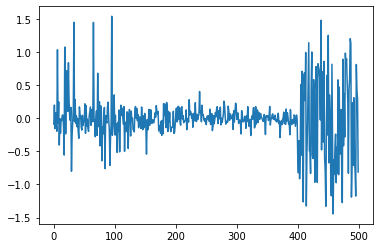

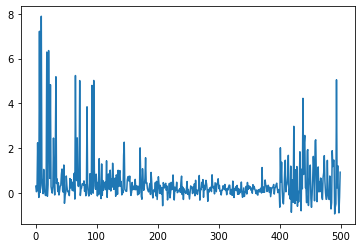

In [22]:
plt.plot(skew)
plt.show()
plt.plot(kurtosis)
plt.show()

In [5]:
var.shape

(500,)

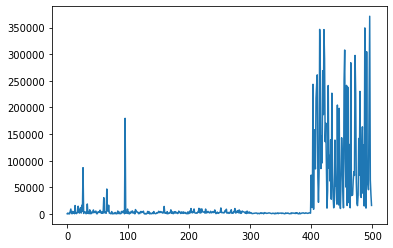

In [7]:
plt.plot(var)

### building our new x based on the statistical data features that we have calculated

In [6]:
# add the new features to the dataset
newX = np.concatenate((var.reshape(-1, 1), mean.reshape(-1, 1), max.reshape(-1, 1), min.reshape(-1, 1),
                        median.reshape(-1, 1), std.reshape(-1, 1)), axis=1)

#### splitting our data into train and test

In [7]:
x_train, x_test, y_train, y_test = train_test_split(newX, y, random_state=seed, test_size=0.2)

### building our model with SVC which is Support Vector Classifier and then we will train our model

In [10]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Entropy is proportional to the degree of disorder in a thermodynamic process; the higher the degree of disorder, the higher the entropy.

In [ ]:
def entropy(signal):
    '''
    function returns entropy of a signal
    signal must be a 1-D numpy array
    '''
    lensig=signal.size
    symset=list(set(signal))
    numsym=len(symset)
    propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
    ent=np.sum([p*np.log2(1.0/p) for p in propab])
    return ent

In [ ]:
# calculate entropy for each signal
ent = np.array([entropy(x[ind, :]) for ind in range(x.shape[0])])
ent.shape

(500,)

#### as you can see below entropy is not a good feature for our data

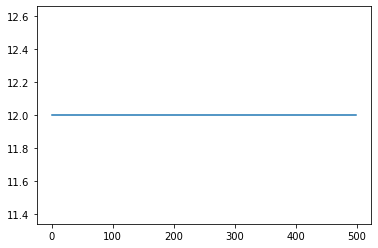

In [ ]:
plt.plot(ent)

### what is fft?
fft is a fast fourier transform which is a mathematical tool that is used to convert a signal from its original domain (time) to a representation in the frequency domain and vice versa.

In [37]:
res_fft = np.fft.fftshift(np.fft.fft(x))

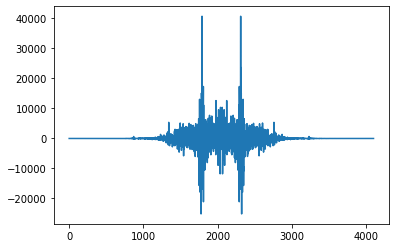

In [ ]:
plt.plot(res_fft[0])

In [38]:
fft_abs = np.abs(res_fft)
fft_mean = np.mean(fft_abs, axis=1)
fft_var = np.var(fft_abs, axis=1)

In [6]:
fft_mean.shape

(500,)

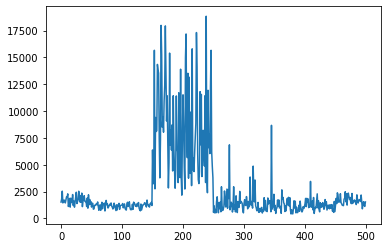

In [ ]:
plt.plot(fft_mean)

In [ ]:
newX = np.concatenate((fft_mean.reshape(-1, 1), fft_var.reshape(-1, 1)), axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(newX, y, random_state=seed, test_size=0.2)

In [ ]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
fft = np.fft.fft(x)
fft_abs = np.abs(fft)
fft_mean = np.mean(fft_abs, axis=1)
fft_var = np.var(fft_abs, axis=1)

In [ ]:
plt.plot(fft[0])

In [ ]:
plt.plot(fft_mean)

In [8]:
freq = np.fft.fft2(x)
freq_abs = np.abs(freq)
freq_abs

array([[54299.3099113 , 56306.14656785, 62319.21483473, ...,
        61169.92142702, 62319.21483473, 56306.14656785],
       [77033.74284452, 80118.71234262, 83820.11809455, ...,
        60653.10006775, 72677.3143124 , 74167.29421778],
       [79155.72915375, 77318.13833529, 76462.75914202, ...,
        87891.13522609, 86198.81371291, 81358.96644186],
       ...,
       [56836.35042754, 58481.36781431, 60694.28326668, ...,
        50488.85907326, 55316.25427748, 55394.66118898],
       [79155.72915375, 81358.96644186, 86198.81371291, ...,
        72539.56763379, 76462.75914202, 77318.13833529],
       [77033.74284452, 74167.29421778, 72677.3143124 , ...,
        90708.11642632, 83820.11809455, 80118.71234262]])

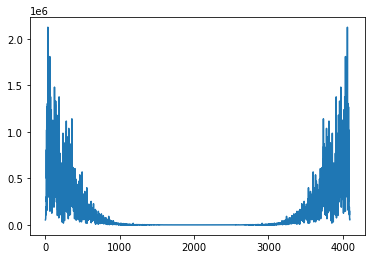

In [13]:
plt.plot(freq_abs[0])


In [9]:
freq_mean = np.mean(freq_abs, axis=1)
freq_var = np.var(freq_abs, axis=1)

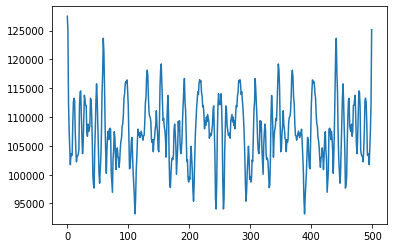

In [15]:
plt.plot(freq_mean)

In [10]:
newX = np.concatenate((freq_mean.reshape(-1, 1), freq_var.reshape(-1, 1)), axis=1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(newX, y, random_state=seed, test_size=0.2)

### this is the result of fft and works well with our data

In [18]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
#calculate the energy of each signal
energy = np.sum(x**2, axis=1)
energy.shape

(500,)

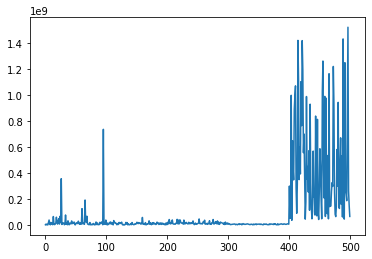

In [13]:
plt.plot(energy)

In [14]:
#create local binary patterns function
def local_binary_pattern(x, n_points, radius, method='uniform'):
    '''
    function returns local binary pattern of a signal
    signal must be a 1-D numpy array
    n_points is the number of points to be considered as neighbourers
    radius is the radius of circle
    method is the type of LBP
    '''
    #get the number of samples in the signal
    n_samples = len(x)
    #create empty numpy array for the output LBP of the signal
    lbp = np.zeros(n_samples - 2 * radius)
    #loop over all the samples in the signal
    for i in range(radius, n_samples - radius):
        #get the center value of the signal
        center = x[i]
        #get the values of the neighbours
        val_neighbours = x[i - radius:i + radius + 1]
        #get the LBP code
        code = 0
        for j, val in enumerate(val_neighbours):
            if j != radius:
                if val >= center:
                    code += 1
                code = code << 1
        #remove the last bit
        code = code >> 1
        #set the code in the LBP image
        lbp[i - radius] = code
    return lbp

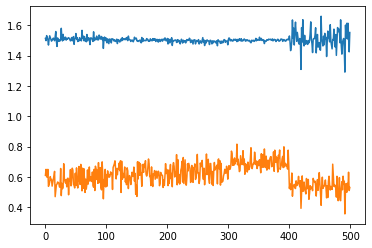

In [15]:
#LBP features
lbp = np.array([local_binary_pattern(x[ind, :], 8, 1, method='uniform') for ind in range(x.shape[0])])
lbp_mean = np.mean(lbp, axis=1)
lbp_var = np.var(lbp, axis=1)
plt.plot(lbp_mean)
plt.plot(lbp_var)

In [14]:
# this feature is the number of ups and downs => code
ups = np.sum(np.diff(np.sign(x)) != 0, axis=1) / 2
ups.shape

(500,)

In [16]:
plt.plot(ups)

NameError: name 'ups' is not defined

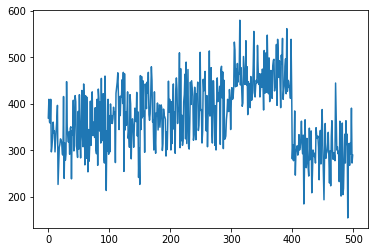

In [25]:
#detect peaks
peaks = np.array([find_peaks(x[ind, :])[0].shape[0] for ind in range(x.shape[0])])
plt.plot(peaks)

In [45]:
newX = np.concatenate((var.reshape(-1, 1), mean.reshape(-1, 1), max.reshape(-1, 1), min.reshape(-1, 1),
                           median.reshape(-1, 1), std.reshape(-1, 1), 
                           freq_mean.reshape(-1, 1), freq_var.reshape(-1, 1)), axis=1)
x_train, x_test, y_train, y_test = train_test_split(newX, y, random_state=seed, test_size=0.2)

In [64]:
newX = np.concatenate((var.reshape(-1, 1), mean.reshape(-1, 1), max.reshape(-1, 1), min.reshape(-1, 1),
                           median.reshape(-1, 1), std.reshape(-1, 1), 
                           freq_mean.reshape(-1, 1), freq_var.reshape(-1, 1), lbp_mean.reshape(-1, 1), lbp_var.reshape(-1, 1),
                           fft_mean.reshape(-1, 1), fft_var.reshape(-1, 1), peaks.reshape(-1, 1), skew.reshape(-1, 1), kurtosis.reshape(-1, 1)), axis=1)
x_train, x_test, y_train, y_test = train_test_split(newX, y, random_state=seed, test_size=0.2)

In [ ]:
newX = np.concatenate((var.reshape(-1, 1), mean.reshape(-1, 1), max.reshape(-1, 1), min.reshape(-1, 1),
                           median.reshape(-1, 1), std.reshape(-1, 1)), axis=1)
x_train, x_test, y_train, y_test = train_test_split(newX, y, random_state=seed, test_size=0.2)

In [65]:
custom_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
custom_clf.fit(x_train, y_train)
y_pred = custom_clf.predict(x_test)

C:\Users\alast\AppData\Local\Temp\ipykernel_19836\1556679198.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  custom_clf.fit(x_train, y_train)


In [66]:
accuracy_score(y_test, y_pred)

0.98

In [67]:
recall_score(y_test, y_pred)

0.9230769230769231

In [68]:
precision_score(y_test, y_pred)

1.0

In [69]:
scores = cross_val_score(custom_clf, newX, y, cv=5)
print("k-fold cross validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

k-fold cross validation accuracy: 0.97 (+/- 0.07)


c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


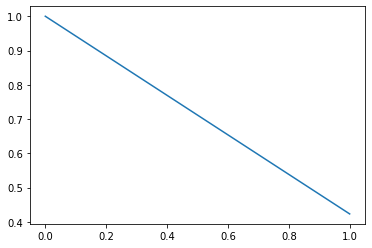

In [75]:
#recall plot
plt.plot(recall_score(y_test, y_pred, average=None))

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


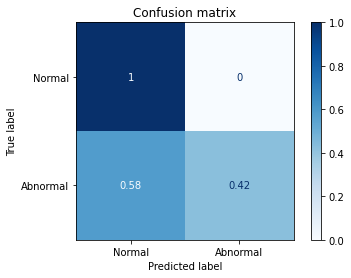

[[74  0]
 [15 11]]


In [83]:
#confusion matrix plot
disp = plot_confusion_matrix(custom_clf, x_test, y_test, display_labels=['Normal', 'Abnormal'], cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('Confusion matrix')
plt.show()
print(confusion_matrix(y_test, y_pred))

In [70]:
custom_clf = KNeighborsClassifier(n_neighbors=2)
custom_clf.fit(x_train, y_train)
y_pred = custom_clf.predict(x_test)

c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [71]:
accuracy_score(y_test, y_pred)

0.85

In [72]:
recall_score(y_test, y_pred)

0.4230769230769231

In [73]:
precision_score(y_test, y_pred)

1.0

In [74]:
scores = cross_val_score(custom_clf, newX, y, cv=5)
print("=> k-fold cross validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

=> k-fold cross validation accuracy: 0.87 (+/- 0.04)


c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

In [ ]:
custom_clf = SVC(kernel='linear')
custom_clf.fit(x_train, y_train)
y_pred = custom_clf.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
precision_score(y_test, y_pred)

In [ ]:
scores = cross_val_score(custom_clf, newX, y, cv=5)
print("=> k-fold cross validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))